In [1]:
import numpy as np
import torch
from sklearn import datasets
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_iris()
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
input, x_test, label, y_test = train_test_split(dataset['data'],dataset['target'], test_size=0.2)

In [4]:
input = torch.FloatTensor(input)
label = torch.LongTensor(label)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [5]:
label_size = int(np.array(label.size()))

In [6]:
class NET(nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(NET, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature,n_hidden1)
        #self.relu1 = nn.ReLU()

        self.hidden2 = torch.nn.Linear(n_hidden1,n_hidden2)
        #self.relu2 = nn.ReLU

        self.out = torch.nn.Linear(n_hidden2,n_output)
        #self.softmax =?
        #前向传播函数
    def forward(self, x):
        hidden1 = self.hidden1(x)
        #relu1 = self.relu1(hidden1)
        
#完善代码:
        hidden2 = self.hidden2(hidden1)
        #relu2 = self.relu1(hidden2)
#
        out = self.out(hidden2)
        
        return out
#测试函数
    def test(self, x):
        y_pred = self.forward(x)
        #y_predict = self.softmax(y_pred)

        return y_pred


In [7]:
net = NET(n_feature=4, n_hidden1=20, n_hidden2=20, n_output=3)

In [8]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.02)
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

In [9]:
loss_func = torch.nn.CrossEntropyLoss()
costs = []

In [10]:
times=2000

In [11]:
for epoch in range(times):
    cost = 0
#完善代码:利用forward和损失函数获得out(输出)和loss(损失)
    out = net.forward(input)
    loss = loss_func(out,label)
#请在下一行注释中回答zero_grad这一行的作用
#
    optimizer.zero_grad()
#完善代码:反向传播 并更新所有参数
    loss.backward()
    optimizer.step()
    cost = cost + loss.cpu().detach().numpy()
    costs.append(cost / label_size)

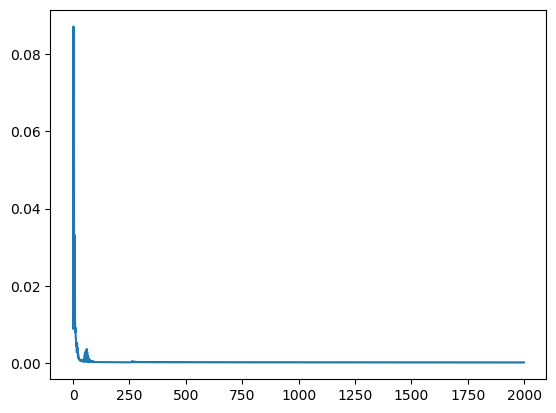

In [12]:
plt.plot(costs)
plt.show()

In [13]:
out = net.test(input)
prediction = torch.max(out, 1)[1]
pred_y = prediction.numpy()
target_y = label.numpy()
print(pred_y,target_y)
accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
print("训练集准确率为", accuracy * 100, "%")

[1 0 1 2 0 0 2 2 1 2 2 1 0 0 0 2 0 1 2 1 1 2 1 2 0 1 2 0 1 1 1 1 1 1 2 1 2
 0 0 0 1 1 2 2 2 2 2 1 1 0 1 0 2 2 0 0 0 1 0 0 1 2 2 1 0 2 2 2 2 1 0 2 1 2
 0 0 1 1 1 0 2 1 2 0 0 1 0 1 1 0 1 1 2 1 2 1 1 1 2 2 1 0 2 2 1 1 0 2 0 2 2
 2 0 1 1 2 2 0 0 1] [1 0 1 2 0 0 2 2 1 2 2 1 0 0 0 2 0 1 2 1 1 2 1 2 0 1 2 0 1 1 1 1 1 1 2 1 2
 0 0 0 1 1 2 2 2 2 2 1 1 0 1 0 2 2 0 0 0 1 0 0 1 2 2 1 0 2 2 2 2 1 0 2 1 2
 0 0 1 1 1 0 2 1 2 0 0 1 0 1 1 0 1 1 2 1 2 1 1 1 2 2 1 0 2 2 1 1 0 2 0 2 2
 2 0 1 2 2 2 0 0 1]
训练集准确率为 99.16666666666667 %


In [14]:
out1 = net.test(x_test)
prediction1 = torch.max(out1, 1)[1]
pred_y1 = prediction1.numpy()
target_y1 = y_test.numpy()

accuracy1 = float((pred_y1 == target_y1).astype(int).sum()) / float(target_y1.size)
print("测试集准确率为", accuracy1 * 100, "%")


测试集准确率为 96.66666666666667 %
